# Question 1: Bifurcation and Chaos in the Logistic Map

First I'll write a function to iterate the logistic map.

In [2]:
def Lmap(x0, r, numsteps):   #computes logistic map output, running for numsteps iterations
    x = x0
    for _ in range(numsteps):
        x = r*x*(1-x)
    return x



a) I found the fixed points by doing some simple algebra. I get:

\begin{equation}
    x = (r-1)/r
\end{equation} 

or $x=0$

In [3]:
#to show this, I'll demonstrate that we converge to these values

print('r=1: ', Lmap(0.2, 1, 1000))
print('r=2: ', Lmap(0.2, 2, 1000))
print('r=3: ', Lmap(0.2, 3, 1000))
print('r=4: ', Lmap(0.2, 4, 1000))

r=1:  0.0009896821088562584
r=2:  0.49999999999999994
r=3:  0.6739969172672533
r=4:  0.13822325807715316


r=1, converged to the x=0 fixed point. r=2,3 converged to their nontrivial fixed points.

r=4 did not converge to 0.75, because this is an unstable fixed point. I know this because |f'(x)| > 1. However, this is true for r=1,2,3.

\begin{equation}
    f'(x) = r(1-2x)
\end{equation} 

In [ ]:
#b) Now adding a convergence threshold:
import numpy as np
import matplotlib.pyplot as plt

def Lmap_converge(x0, r, eps):   #computes logistic map output, running for numsteps iterations
    xprev = x0
    steps = 0
    plotlist = []

    while(steps<1000):      #prevent running forever
        x = r*xprev*(1-xprev)
        plotlist.append(x)
        if(np.abs(x-xprev)<eps):
            return plotlist
        
        xprev = x
        steps+=1
    
    return plotlist


a = Lmap_converge(0.2, 2, 0.01)
print(a[-1])
b = Lmap_converge(0.2, 3, 0.01)
print(b[-1])
c = Lmap_converge(0.2, 3.5, 0.01)
print(c[-1])
d = Lmap_converge(0.2, 3.8, 0.01)
print(d[-1])
e = Lmap_converge(0.2, 4, 0.01)
print(e[-1])



0.4998589445046272
0.6739969172672533
0.8269407065914387
0.737867735147888
0.0009849764623626413


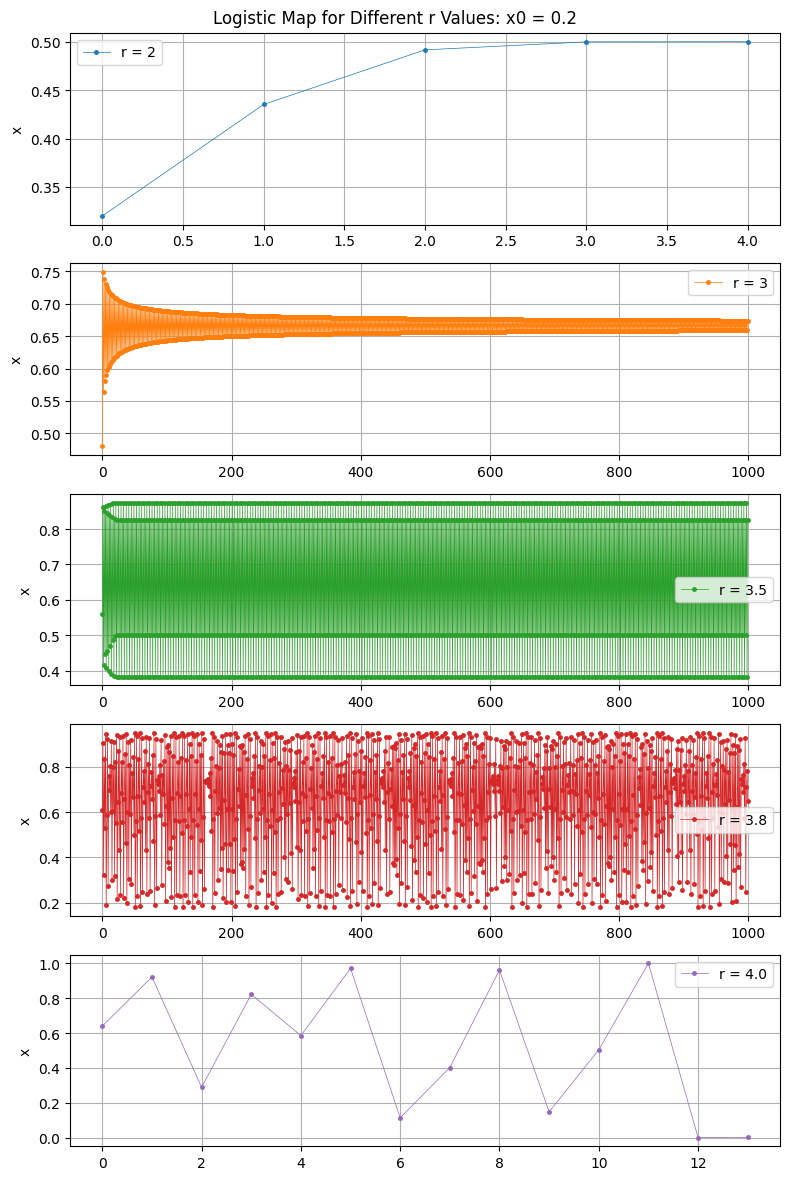

In [15]:
# Parameters
x0 = 0.2   # Initial condition
r_values = [2, 3, 3.5, 3.8, 4.0]  # Different values of r

# Create Subplots (5,1)
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=False)

for i, r in enumerate(r_values):
    values = Lmap_converge(x0, r, 0.001)  # Get logistic map values
    axes[i].plot(values, label=f"r = {r}", color=f"C{i}", linestyle='-', linewidth=0.5, marker='.', markersize=5)
    axes[i].set_ylabel("x")
    axes[i].legend()
    axes[i].grid()

fig.suptitle("Logistic Map for Different r Values: x0 = 0.2")
plt.tight_layout()
plt.show()


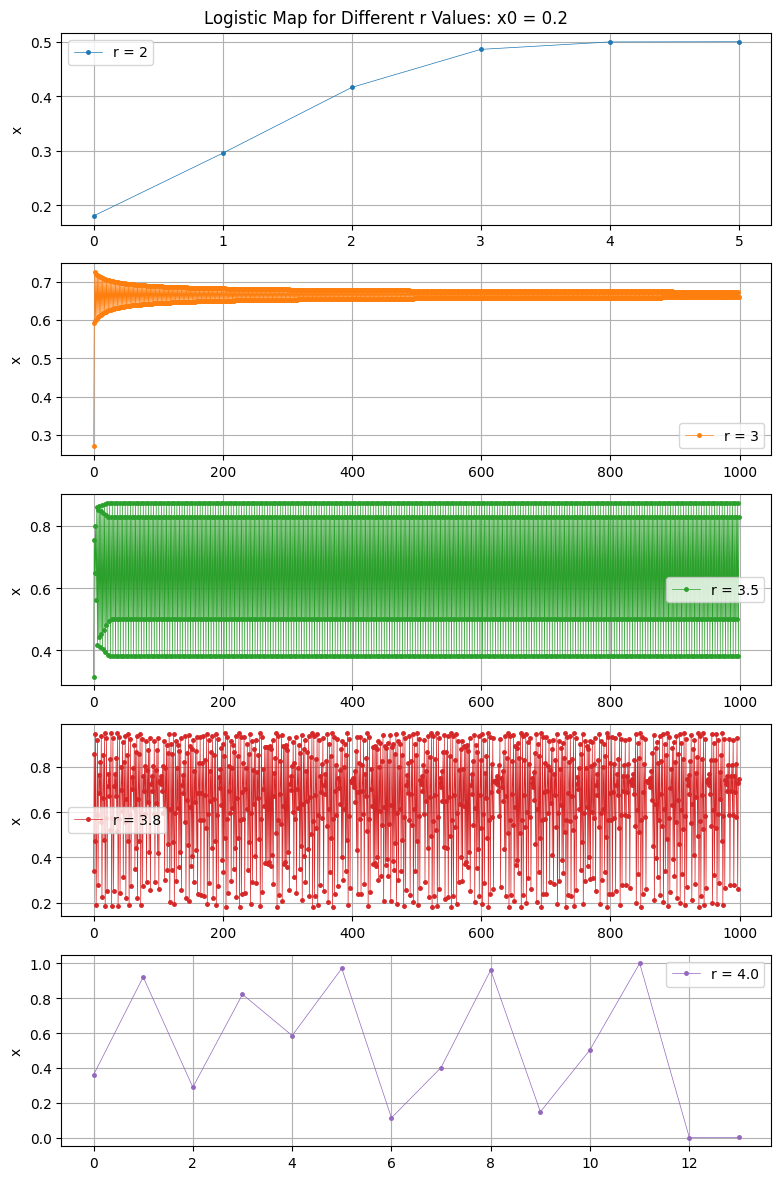

In [ ]:
x0 = 0.1   # Initial condition
r_values = [2, 3, 3.5, 3.8, 4.0]  # Different values of r

# Create Subplots (5,1)
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=False)

for i, r in enumerate(r_values):
    values = Lmap_converge(x0, r, 0.001)  # Get logistic map values
    axes[i].plot(values, label=f"r = {r}", color=f"C{i}", linestyle='-', linewidth=0.5, marker='.', markersize=5)
    axes[i].set_ylabel("x")
    axes[i].legend()
    axes[i].grid()

fig.suptitle("Logistic Map for Different r Values: x0 = 0.1")
plt.tight_layout()
plt.show()

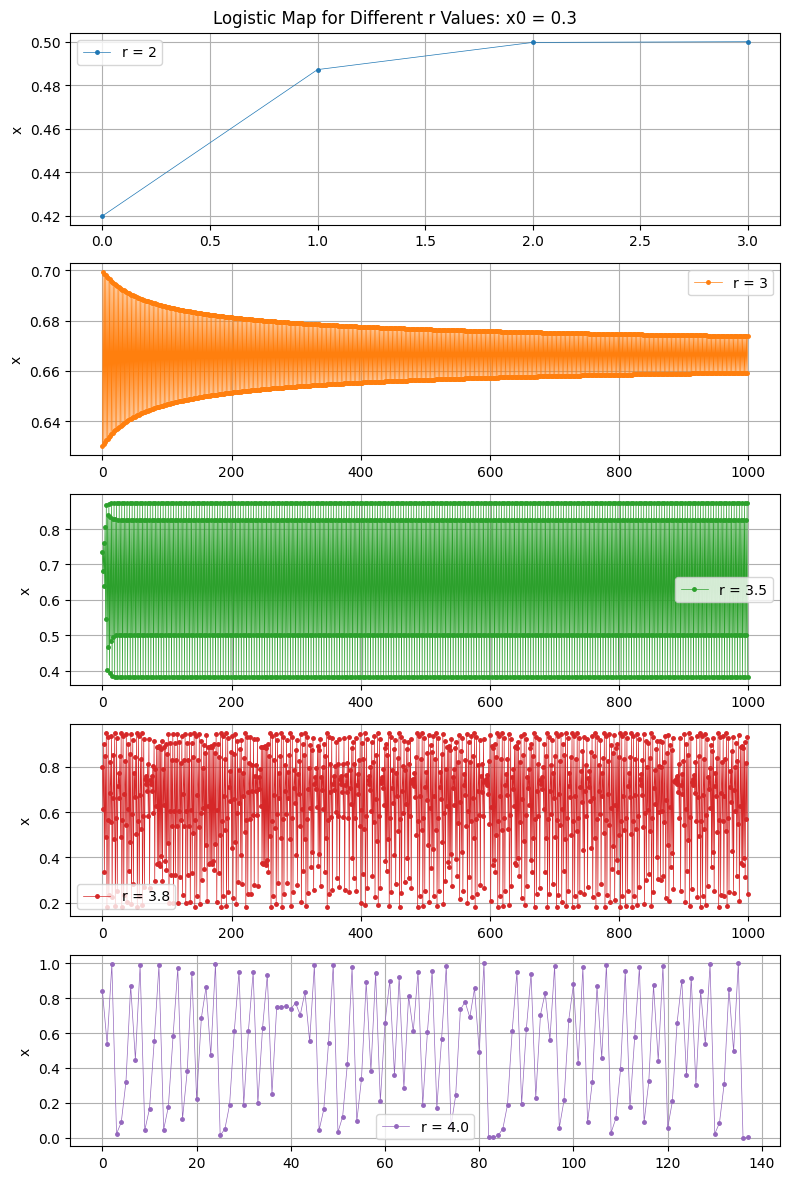

In [16]:
x0 = 0.3   # Initial condition
r_values = [2, 3, 3.5, 3.8, 4.0]  # Different values of r

# Create Subplots (5,1)
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=False)

for i, r in enumerate(r_values):
    values = Lmap_converge(x0, r, 0.001)  # Get logistic map values
    axes[i].plot(values, label=f"r = {r}", color=f"C{i}", linestyle='-', linewidth=0.5, marker='.', markersize=5)
    axes[i].set_ylabel("x")
    axes[i].legend()
    axes[i].grid()

fig.suptitle("Logistic Map for Different r Values: x0 = 0.3")
plt.tight_layout()
plt.show()

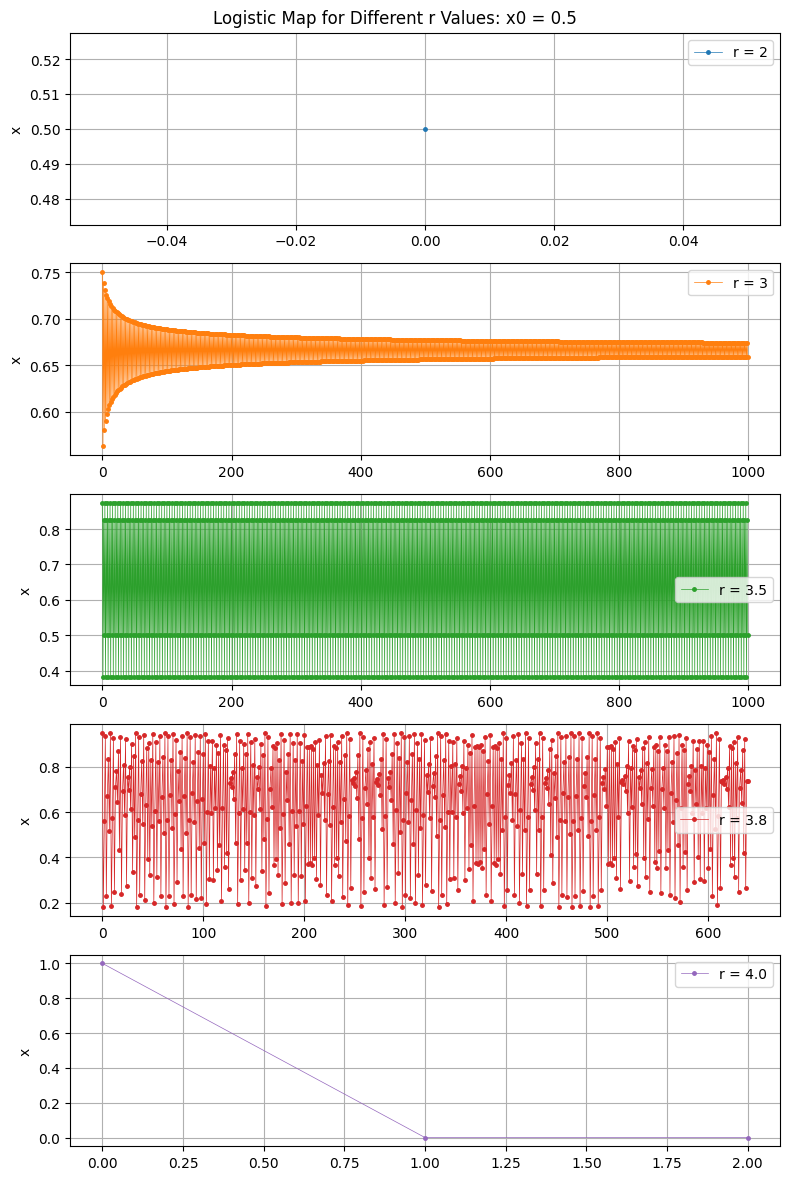

In [17]:
x0 = 0.5   # Initial condition
r_values = [2, 3, 3.5, 3.8, 4.0]  # Different values of r

# Create Subplots (5,1)
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=False)

for i, r in enumerate(r_values):
    values = Lmap_converge(x0, r, 0.001)  # Get logistic map values
    axes[i].plot(values, label=f"r = {r}", color=f"C{i}", linestyle='-', linewidth=0.5, marker='.', markersize=5)
    axes[i].set_ylabel("x")
    axes[i].legend()
    axes[i].grid()

fig.suptitle("Logistic Map for Different r Values: x0 = 0.5")
plt.tight_layout()
plt.show()

# d) Bifurcation condition

To accomplish this, I wanted a function to output all steady state end values. These are values the program cycles through many times.

In [28]:
def find_significant_repeats(arr, error, min_count):
    arr = np.sort(arr)  # Sort the array for easier clustering
    clusters = []
    
    # Create clusters of numbers within the error margin
    for num in arr:
        for cluster in clusters:
            if abs(num - np.mean(cluster)) <= error:
                cluster.append(num)
                break
        else:
            clusters.append([num])
    
    # Find cluster centers that appear at least min_count times
    significant_values = [np.mean(cluster) for cluster in clusters if len(cluster) >= min_count]
    
    return significant_values


def Lmap_converge_returnrepeats(x0, r, eps):   #computes logistic map output, running for numsteps iterations
    xprev = x0
    steps = 0
    cont=True
    plotlist = []

    while(steps<1000):      #prevent running forever
        x = r*xprev*(1-xprev)
        plotlist.append(x)
        if(np.abs(x-xprev)<eps):
            return np.array([x])        #if it converges just return the one final value
        else:
            xprev = x
            steps+=1

    return find_significant_repeats(plotlist, 0.01, 50)
    
    


# Parameters
x0 = 0.2   # Initial condition
r_values = np.concatenate([np.linspace(0, 2, 11), np.linspace(2,4, 41)]) # Different values of r


for i, r in enumerate(r_values):
    steadyvals = Lmap_converge_returnrepeats(x0, r, 0.0001)  # Get logistic map values. Tighter convergence here
    
    print('r= ', r, ' gives steady state values of ', steadyvals)




r=  0.0  gives steady state values of  [0.]
r=  0.2  gives steady state values of  [9.83587733e-06]
r=  0.4  gives steady state values of  [3.77281924e-05]
r=  0.6000000000000001  gives steady state values of  [9.99334044e-05]
r=  0.8  gives steady state values of  [0.00035977]
r=  1.0  gives steady state values of  [0.00988932]
r=  1.2000000000000002  gives steady state values of  [0.16705]
r=  1.4000000000000001  gives steady state values of  [0.28559426]
r=  1.6  gives steady state values of  [0.37496985]
r=  1.8  gives steady state values of  [0.4444338]
r=  2.0  gives steady state values of  [0.5]
r=  2.0  gives steady state values of  [0.5]
r=  2.05  gives steady state values of  [0.51219558]
r=  2.1  gives steady state values of  [0.52380077]
r=  2.15  gives steady state values of  [0.53487629]
r=  2.2  gives steady state values of  [0.5454621]
r=  2.25  gives steady state values of  [0.55554926]
r=  2.3  gives steady state values of  [0.56519976]
r=  2.35  gives steady state va

To be honest, this wasn't that helpful. It's still hard to judge when the paths diverge, and it's hard to tell the difference between chaos and convergence. I'll try again by plotting a bifurcation diagram.

Below I've also shaded in red the region where |f'(x)| < 1. Leaving this area corresponds to the first bifurcation.

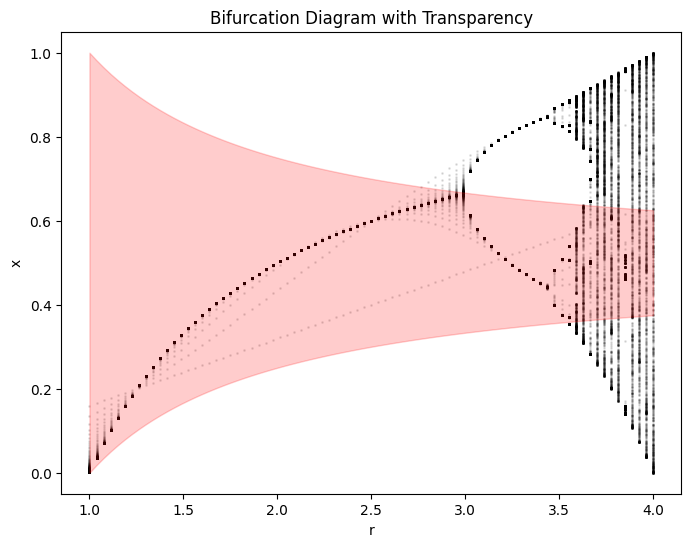

In [40]:
def Lmap_1000(x0, r, eps):   #computes logistic map output, running for numsteps iterations
    xprev = x0
    plotlist = []

    for _ in range(1000):      #prevent running forever
        x = r*xprev*(1-xprev)
        plotlist.append(x)
        xprev = x
    
    return np.array(plotlist)


# Parameters
x0 = 0.2   # Initial condition
#r_values = np.concatenate([np.linspace(0, 2, 11), np.linspace(2,4, 41)]) #nothing really interesting happens below r=2
r_values = np.linspace(1,4,81 )


plt.figure(figsize=(8, 6))


for i, r in enumerate(r_values):
    rvals = np.array([r]*1000)
    xvals = Lmap_1000(x0, r, 1000)   #Get logistic map values. Do 1000 iterations each time to evenly judge where everything ends up
    plt.scatter(rvals, xvals, s=1, alpha=0.1, color='black')


# Compute bounds for shading
x_lower = (1 - 1 / r_values) / 2
x_upper = (1 + 1 / r_values) / 2

# Shade the region where |r(1 - 2x)| < 1
plt.fill_between(r_values, x_lower, x_upper, 
                color='red', alpha=0.2, label=r"$|r(1 - 2x)| < 1$")
  
    
plt.xlabel("r")
plt.ylabel("x")
plt.title("Bifurcation Diagram with Transparency")
plt.show()



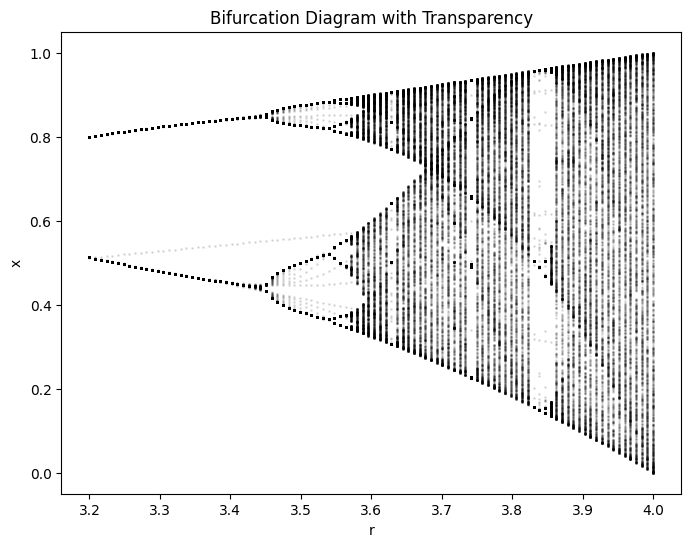

In [ ]:
#let's zoom in even further

x0 = 0.2   # Initial condition
#r_values = np.concatenate([np.linspace(0, 2, 11), np.linspace(2,4, 41)]) #nothing really interesting happens below r=2
r_values = np.linspace(3.2,4,100 )


plt.figure(figsize=(8, 6))


for i, r in enumerate(r_values):
    rvals = np.array([r]*1000)
    xvals = Lmap_1000(x0, r, 1000)   #Get logistic map values. Do 1000 iterations each time to evenly judge where everything ends up
    plt.scatter(rvals, xvals, s=1, alpha=0.1, color='black')
    
    
plt.xlabel("r")
plt.ylabel("x")
plt.title("Bifurcation Diagram with Transparency")
plt.show()

From the above two plots, I can clearly identify the regions.

$r_1 = 1$

$r_2 = r_3 = 3$

$r_4 = 3.42$

$r_5 = 3.54$

$r_6 = 3.57$

$r_7 = 3.83$  Here I see a decently sized window of periodicity.

$r_8 = 3.86$ Chaos again.




e) I'll find the first bifurcation point by slowly increasing r until the system doesn't converge to a single point anymore.

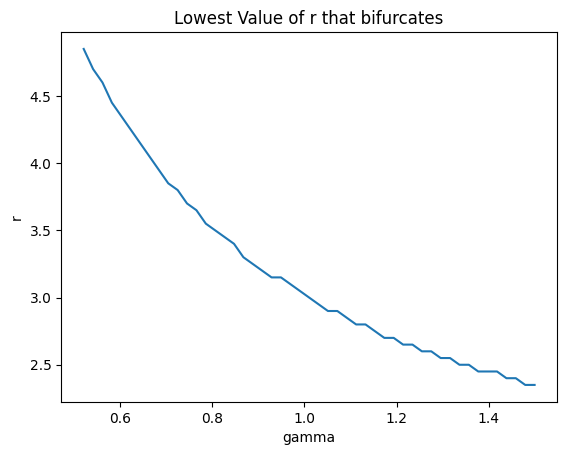

In [45]:
def Lmap_bif(x0, r, gamma, eps):   #determines of logistic map every converges
    xprev = x0

    for _ in range(1000):      
        x = r*xprev*(1-xprev**gamma)
        if(np.abs(x-xprev)<eps):
            return False
        
        xprev = x
    
    return True


def first_r(gamma):
    x0 = 0.2
    r = 0.0


    for _ in range(100):
        stop = Lmap_bif(x0, r, gamma, 0.0001)
        if(stop):
            return r
        else:
            r += 0.05
        
       

gammavals = np.linspace(0.5, 1.5, 50)
frvals = []

for gam in gammavals:
    frvals.append(first_r(gam))

plt.plot(gammavals, frvals)
plt.xlabel("gamma")
plt.ylabel("r")
plt.title("Lowest Value of r that bifurcates")
plt.show()


